**Note:** This notebook requires [PRISM 4.7](https://www.prismmodelchecker.org/download.php) to be installed and
added to your PATH.

In [1]:
from markovsoccer.team_model import TeamModel
from markovsoccer.features import SideUsage, SideUsageShot, InwardsOutwardsPreference, SpeedOfPlay, LongBalls, \
    LongGoalKicks, SuccessfulCounterattackProbability, AbilityToCreateShootingOpportunities

## Read Team Model

In [2]:
model_path = "../models/Arsenal.prism"
team_model = TeamModel.read_from(model_path)

## Features Related to a Team's Preference for Certain Locations

Features 1-3 characterize a team's preference for the left, central, and right zone of the field. This is quantified
by the relative usage of that zone.

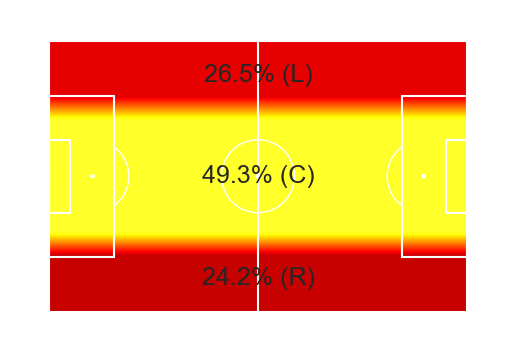

In [3]:
SideUsage.visualize(team_model)

Features 4-6 characterize a team's preference for the left, central, and right zone of the field during the build-up
of shooting opportunities. This can be used to identify the zones from which danger is actually created. It is
quantified by the relative usage of each zone for sequences ending in a shot.

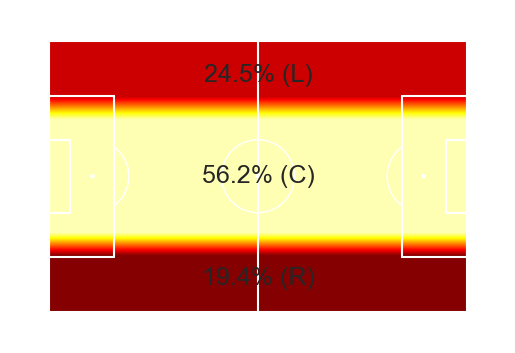

In [4]:
SideUsageShot.visualize(team_model)

## Features Related to a Team's Preference for Certain Sequences

Feature 7 and 8 characterize a team's preference to move the ball inwards (to the center) and outwards (to the sides).
This is quantified by the percentage of the top 200 most likely 2-action subsequences which point inwards and outwards
respectively.

In [5]:
InwardsOutwardsPreference.calculate(team_model)

{'inwards': 0.375, 'outwards': 0.19}

The following method can be used to visualize the *n* most likely 2-action subsequences. The arrows indicate the
start and end location of each ball movement.

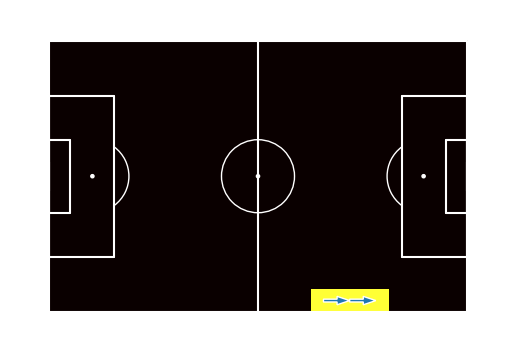

In [6]:
InwardsOutwardsPreference.visualize_most_likely_subsequences(team_model, 1)

## Features Related to a Team's Directness of Play

Feature 9 characterizes a team's speed of play. This is quantified as the expected number of actions in a sequence
ending in a shot.

In [7]:
SpeedOfPlay.calculate(team_model)

13.236505564966293

Feature 10 characterizes a team's probability of using a long ball. This is quantified as the probability of directly
 moving the ball from the own half to the attacking third.

In [8]:
LongBalls.calculate(team_model)  # check sheffield

0.012920062491507242

Feature 11 characterizes a team's probability of a long goal kick. This is quantified as the probability of directly
kicking a goal kick to the opponent half.

In [9]:
LongGoalKicks.calculate(team_model)

0.4266666666666666

Feature 12 characterizes a team's probability of launching successful counterattacks. This is quantified as the
probability of arriving at a shot within eight actions after recovering the ball in the own half.

In [10]:
SuccessfulCounterattackProbability.calculate(team_model)

0.02271294228394484

## Feature Related to a Team's Ability to Create Shooting Opportunities

Feature 13 characterizes a team's probability of creating (non-opportunistic) shooting opportunities. This is
quantified as the probability of eventually arriving at a shot when the team possesses the ball in the own half.

In [11]:
AbilityToCreateShootingOpportunities.calculate(team_model)

0.13566927116847594

The discussed features can be used for several use cases, such as finding similar teams and performing an in-depth
analysis of a particular team.